# Anomaly Detection Analysis
## Analyzing 003_Anomaly_4375.csv for Outliers

This notebook applies multiple anomaly detection techniques to identify unusual data points in the dataset.

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

# Set display options
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Explore the CSV Data

In [2]:
# Load the CSV file
df = pd.read_csv('003_Anomaly_4375.csv', header=None, names=['value'])

# Basic info about the data
print(f"Dataset shape: {df.shape}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nFirst 10 rows:")
df.head(10)

Dataset shape: (10000, 1)

Data types:
value    float64
dtype: object

First 10 rows:


,value
0,-136.188460
1,-41.073108
2,161.421950
3,158.512310
4,162.856510
5,186.308460
6,174.623640
7,173.318020
8,175.077010
9,121.794380


In [3]:
# Statistical summary
print("Statistical Summary:")
print(df.describe())

# Check for missing values
print(f"\nMissing values: {df['value'].isna().sum()}")

Statistical Summary:
              value
count  10000.000000
mean     -24.823644
std      172.412170
min    -1006.767100
25%      -74.993010
50%       -4.627857
75%       74.781325
max      867.311710

Missing values: 0


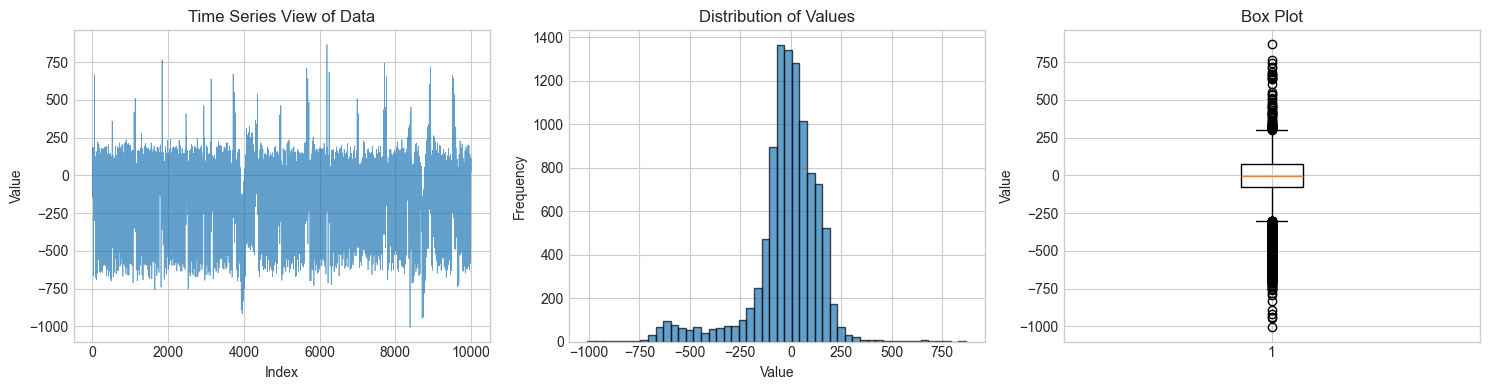

In [4]:
# Visualize the data distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Time series plot
axes[0].plot(df['value'], linewidth=0.5, alpha=0.7)
axes[0].set_title('Time Series View of Data')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Value')

# Histogram
axes[1].hist(df['value'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Values')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

# Box plot
axes[2].boxplot(df['value'], vert=True)
axes[2].set_title('Box Plot')
axes[2].set_ylabel('Value')

plt.tight_layout()
plt.show()

## 3. Data Preprocessing

In [5]:
# Add index as a feature for time-based analysis
df['index'] = df.index

# Standardize the values for ML algorithms
scaler = StandardScaler()
df['value_scaled'] = scaler.fit_transform(df[['value']])

print("Data preprocessing complete!")
print(f"\nScaled values statistics:")
print(df['value_scaled'].describe())

Data preprocessing complete!

Scaled values statistics:
count    1.000000e+04
mean    -1.847411e-17
std      1.000050e+00
min     -5.695610e+00
25%     -2.909996e-01
50%      1.171425e-01
75%      5.777431e-01
max      5.174692e+00
Name: value_scaled, dtype: float64


## 4. Statistical Anomaly Detection using Z-Score

Z-Score measures how many standard deviations a data point is from the mean. Values with |Z| > 3 are typically considered anomalies.

In [6]:
# Calculate Z-scores
df['z_score'] = np.abs(stats.zscore(df['value']))

# Flag anomalies (Z-score > 3)
z_threshold = 3
df['zscore_anomaly'] = df['z_score'] > z_threshold

# Results
zscore_anomalies = df[df['zscore_anomaly']]
print(f"Z-Score Anomaly Detection (threshold = {z_threshold}):")
print(f"Number of anomalies detected: {len(zscore_anomalies)}")
print(f"Percentage of data: {len(zscore_anomalies)/len(df)*100:.2f}%")
print(f"\nAnomaly indices and values:")
print(zscore_anomalies[['value', 'z_score']].head(20))

Z-Score Anomaly Detection (threshold = 3):
Number of anomalies detected: 334
Percentage of data: 3.34%

Anomaly indices and values:
         value   z_score
26  -667.58179  3.728219
53   667.82797  4.017618
82  -675.83213  3.776074
109 -692.44223  3.872418
134 -648.31127  3.616443
135 -550.78597  3.050763
161 -559.77612  3.102909
187 -638.41422  3.559037
213 -645.54152  3.600378
239 -634.03970  3.533663
266 -642.87461  3.584909
293 -596.26896  3.314580
317 -592.57116  3.293131
342 -599.03583  3.330629
369 -664.43566  3.709970
395 -622.42546  3.466296
420 -667.96201  3.730424
446 -634.31350  3.535251
472 -682.41466  3.814255
473 -596.90831  3.318288


## 5. Anomaly Detection using IQR Method

The Interquartile Range (IQR) method identifies outliers that fall below Q1 - 1.5×IQR or above Q3 + 1.5×IQR.

In [7]:
# Calculate IQR
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# Flag anomalies
df['iqr_anomaly'] = (df['value'] < lower_bound) | (df['value'] > upper_bound)

# Results
iqr_anomalies = df[df['iqr_anomaly']]
print(f"\nIQR Anomaly Detection:")
print(f"Number of anomalies detected: {len(iqr_anomalies)}")
print(f"Percentage of data: {len(iqr_anomalies)/len(df)*100:.2f}%")
print(f"\nAnomaly indices and values:")
print(iqr_anomalies[['value']].head(20))

Q1 (25th percentile): -74.99
Q3 (75th percentile): 74.78
IQR: 149.77
Lower bound: -299.65
Upper bound: 299.44

IQR Anomaly Detection:
Number of anomalies detected: 753
Percentage of data: 7.53%

Anomaly indices and values:
         value
25  -394.82460
26  -667.58179
53   667.82797
55  -300.58930
82  -675.83213
83  -371.23611
108 -414.48082
109 -692.44223
134 -648.31127
135 -550.78597
160 -330.45430
161 -559.77612
187 -638.41422
188 -379.69493
212 -302.75020
213 -645.54152
238 -342.95792
239 -634.03970
266 -642.87461
267 -444.62902


## 6. Isolation Forest for Anomaly Detection

Isolation Forest isolates anomalies by randomly selecting features and splitting values. Anomalies are isolated faster (shorter path lengths).

In [8]:
# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42, n_estimators=100)
df['iso_forest_pred'] = iso_forest.fit_predict(df[['value']])
df['iso_forest_anomaly'] = df['iso_forest_pred'] == -1

# Get anomaly scores
df['iso_forest_score'] = iso_forest.decision_function(df[['value']])

# Results
iso_anomalies = df[df['iso_forest_anomaly']]
print(f"Isolation Forest Anomaly Detection (contamination=1%):")
print(f"Number of anomalies detected: {len(iso_anomalies)}")
print(f"Percentage of data: {len(iso_anomalies)/len(df)*100:.2f}%")
print(f"\nTop 20 anomalies by score:")
print(iso_anomalies.nsmallest(20, 'iso_forest_score')[['value', 'iso_forest_score']])

Isolation Forest Anomaly Detection (contamination=1%):
Number of anomalies detected: 100
Percentage of data: 1.00%

Top 20 anomalies by score:
          value  iso_forest_score
6193  867.31171         -0.080649
1840  765.65370         -0.077947
5659  711.16467         -0.077947
7712  744.32215         -0.077947
8924  715.76957         -0.077947
6250  684.88039         -0.075791
53    667.82797         -0.075253
3716  670.76959         -0.075253
9506  662.65040         -0.075253
7769  654.78197         -0.073104
3134  639.35595         -0.072568
5687  640.56975         -0.072568
9535  642.46994         -0.072568
8896  604.80911         -0.071497
3744  552.26259         -0.069893
4360  536.85854         -0.069893
9564  534.34735         -0.069893
1129  511.21928         -0.066694
6991  508.11508         -0.066694
5716  484.96376         -0.061391


## 7. Local Outlier Factor (LOF) Detection

LOF measures local density deviation. Points with substantially lower density than their neighbors are considered outliers.

In [9]:
# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
df['lof_pred'] = lof.fit_predict(df[['value']])
df['lof_anomaly'] = df['lof_pred'] == -1

# Get LOF scores (negative outlier factor)
df['lof_score'] = lof.negative_outlier_factor_

# Results
lof_anomalies = df[df['lof_anomaly']]
print(f"Local Outlier Factor Detection (contamination=1%):")
print(f"Number of anomalies detected: {len(lof_anomalies)}")
print(f"Percentage of data: {len(lof_anomalies)/len(df)*100:.2f}%")
print(f"\nTop 20 anomalies by LOF score:")
print(lof_anomalies.nsmallest(20, 'lof_score')[['value', 'lof_score']])

Local Outlier Factor Detection (contamination=1%):
Number of anomalies detected: 100
Percentage of data: 1.00%

Top 20 anomalies by LOF score:
            value  lof_score
8387 -1006.767100  -6.240770
8707  -945.203600  -5.135960
8734  -937.743680  -5.007837
3955  -917.636040  -4.662490
3930  -889.944850  -4.186898
3983  -833.888920  -3.438125
8386  -789.059120  -2.820969
8761  -780.389130  -2.607860
1648  -756.590230  -2.089541
4008  -751.977260  -1.987457
2527  -750.447970  -1.956666
6193   867.311710  -1.826213
1811  -740.549800  -1.763500
9650  -739.310870  -1.734424
5848  -730.439050  -1.566864
982    -63.709813  -1.536441
1840   765.653700  -1.523601
9525   -63.680793  -1.507692
7712   744.322150  -1.473436
1535   -63.829385  -1.472920


## 8. Visualize Anomalies

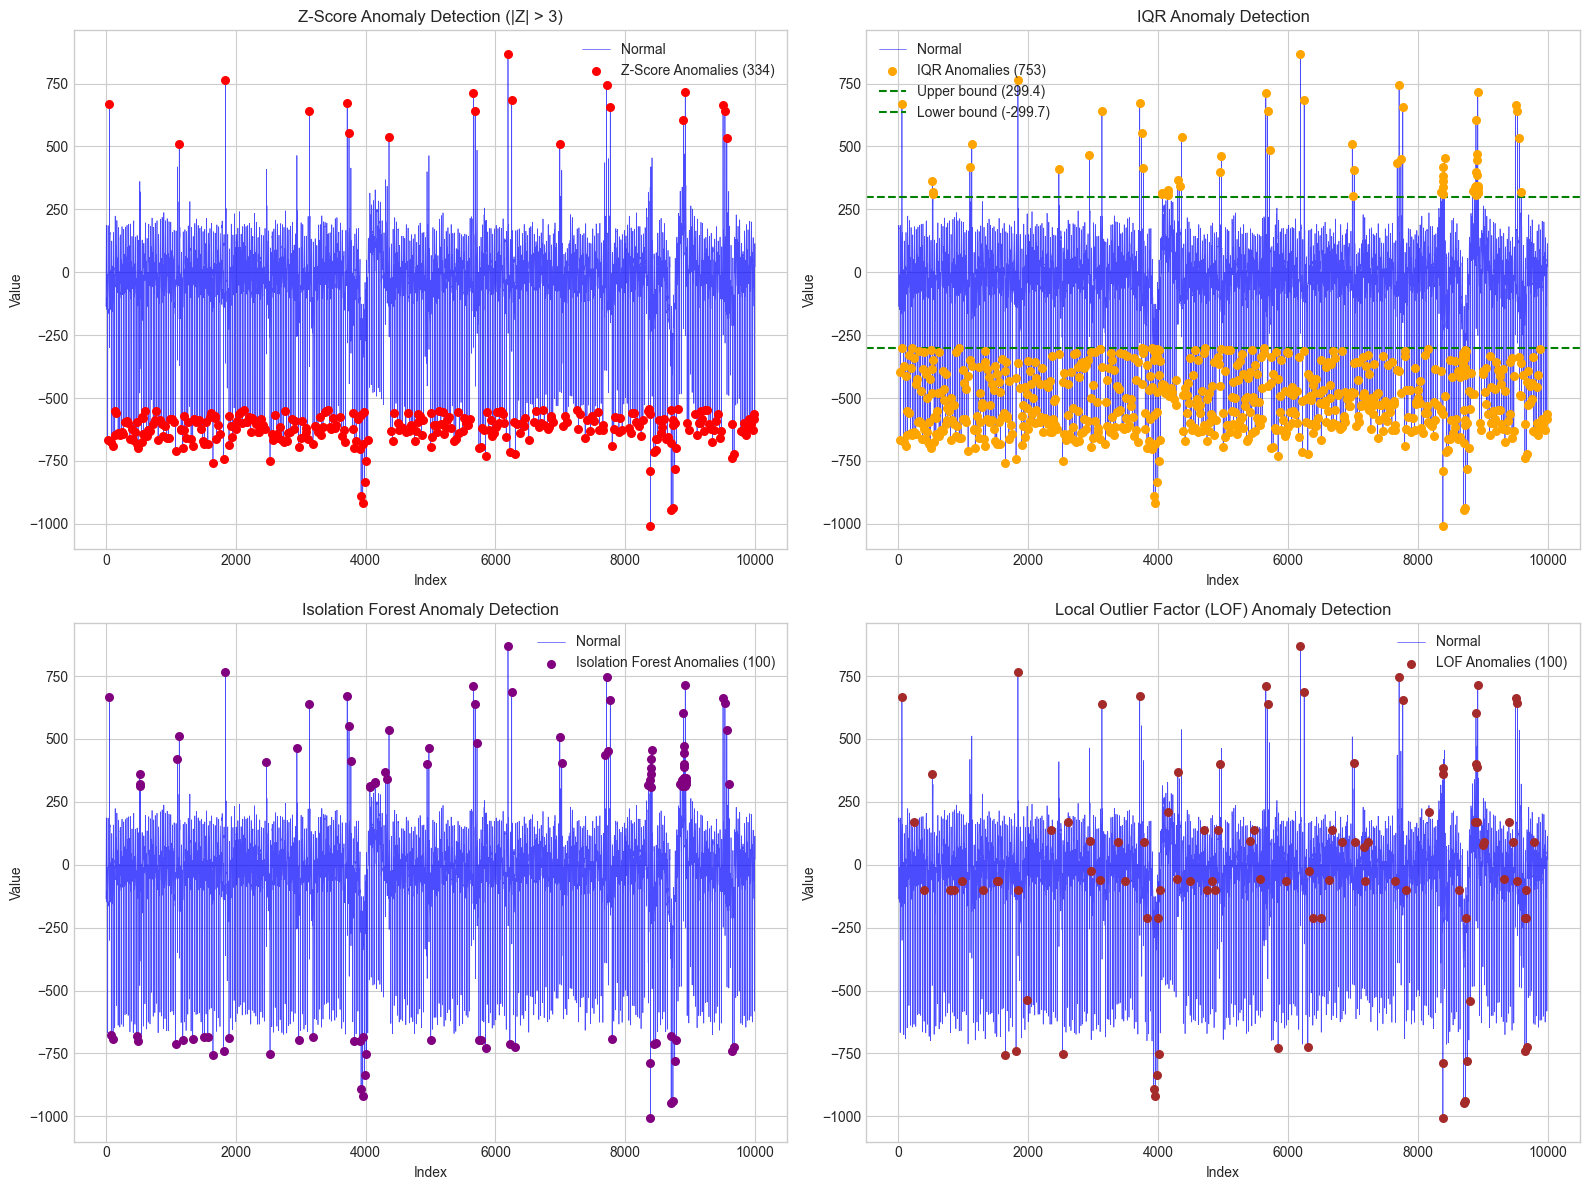

In [10]:
# Visualization of all anomaly detection methods
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Z-Score Anomalies
ax1 = axes[0, 0]
ax1.plot(df['index'], df['value'], 'b-', linewidth=0.5, alpha=0.7, label='Normal')
ax1.scatter(df[df['zscore_anomaly']]['index'], df[df['zscore_anomaly']]['value'], 
            c='red', s=30, label=f'Z-Score Anomalies ({len(zscore_anomalies)})', zorder=5)
ax1.set_title('Z-Score Anomaly Detection (|Z| > 3)')
ax1.set_xlabel('Index')
ax1.set_ylabel('Value')
ax1.legend()

# 2. IQR Anomalies
ax2 = axes[0, 1]
ax2.plot(df['index'], df['value'], 'b-', linewidth=0.5, alpha=0.7, label='Normal')
ax2.scatter(df[df['iqr_anomaly']]['index'], df[df['iqr_anomaly']]['value'], 
            c='orange', s=30, label=f'IQR Anomalies ({len(iqr_anomalies)})', zorder=5)
ax2.axhline(y=upper_bound, color='green', linestyle='--', label=f'Upper bound ({upper_bound:.1f})')
ax2.axhline(y=lower_bound, color='green', linestyle='--', label=f'Lower bound ({lower_bound:.1f})')
ax2.set_title('IQR Anomaly Detection')
ax2.set_xlabel('Index')
ax2.set_ylabel('Value')
ax2.legend()

# 3. Isolation Forest Anomalies
ax3 = axes[1, 0]
ax3.plot(df['index'], df['value'], 'b-', linewidth=0.5, alpha=0.7, label='Normal')
ax3.scatter(df[df['iso_forest_anomaly']]['index'], df[df['iso_forest_anomaly']]['value'], 
            c='purple', s=30, label=f'Isolation Forest Anomalies ({len(iso_anomalies)})', zorder=5)
ax3.set_title('Isolation Forest Anomaly Detection')
ax3.set_xlabel('Index')
ax3.set_ylabel('Value')
ax3.legend()

# 4. LOF Anomalies
ax4 = axes[1, 1]
ax4.plot(df['index'], df['value'], 'b-', linewidth=0.5, alpha=0.7, label='Normal')
ax4.scatter(df[df['lof_anomaly']]['index'], df[df['lof_anomaly']]['value'], 
            c='brown', s=30, label=f'LOF Anomalies ({len(lof_anomalies)})', zorder=5)
ax4.set_title('Local Outlier Factor (LOF) Anomaly Detection')
ax4.set_xlabel('Index')
ax4.set_ylabel('Value')
ax4.legend()

plt.tight_layout()
plt.show()

## 9. Summary and Comparison of Methods

In [11]:
# Summary comparison
print("=" * 60)
print("ANOMALY DETECTION SUMMARY")
print("=" * 60)

summary_data = {
    'Method': ['Z-Score (|Z| > 3)', 'IQR Method', 'Isolation Forest', 'Local Outlier Factor'],
    'Anomalies Detected': [len(zscore_anomalies), len(iqr_anomalies), len(iso_anomalies), len(lof_anomalies)],
    'Percentage': [f"{len(zscore_anomalies)/len(df)*100:.2f}%", 
                   f"{len(iqr_anomalies)/len(df)*100:.2f}%",
                   f"{len(iso_anomalies)/len(df)*100:.2f}%",
                   f"{len(lof_anomalies)/len(df)*100:.2f}%"]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# Consensus: points flagged by multiple methods
df['anomaly_count'] = (df['zscore_anomaly'].astype(int) + 
                       df['iqr_anomaly'].astype(int) + 
                       df['iso_forest_anomaly'].astype(int) + 
                       df['lof_anomaly'].astype(int))

consensus_anomalies = df[df['anomaly_count'] >= 2]
print(f"\n\nConsensus Anomalies (flagged by 2+ methods): {len(consensus_anomalies)}")
print(f"\nTop consensus anomalies:")
print(consensus_anomalies[['value', 'z_score', 'anomaly_count']].head(20))

ANOMALY DETECTION SUMMARY
              Method  Anomalies Detected Percentage
   Z-Score (|Z| > 3)                 334      3.34%
          IQR Method                 753      7.53%
    Isolation Forest                 100      1.00%
Local Outlier Factor                 100      1.00%


Consensus Anomalies (flagged by 2+ methods): 376

Top consensus anomalies:
         value   z_score  anomaly_count
26  -667.58179  3.728219              2
53   667.82797  4.017618              4
82  -675.83213  3.776074              3
109 -692.44223  3.872418              3
134 -648.31127  3.616443              2
135 -550.78597  3.050763              2
161 -559.77612  3.102909              2
187 -638.41422  3.559037              2
213 -645.54152  3.600378              2
239 -634.03970  3.533663              2
266 -642.87461  3.584909              2
293 -596.26896  3.314580              2
317 -592.57116  3.293131              2
342 -599.03583  3.330629              2
369 -664.43566  3.709970             

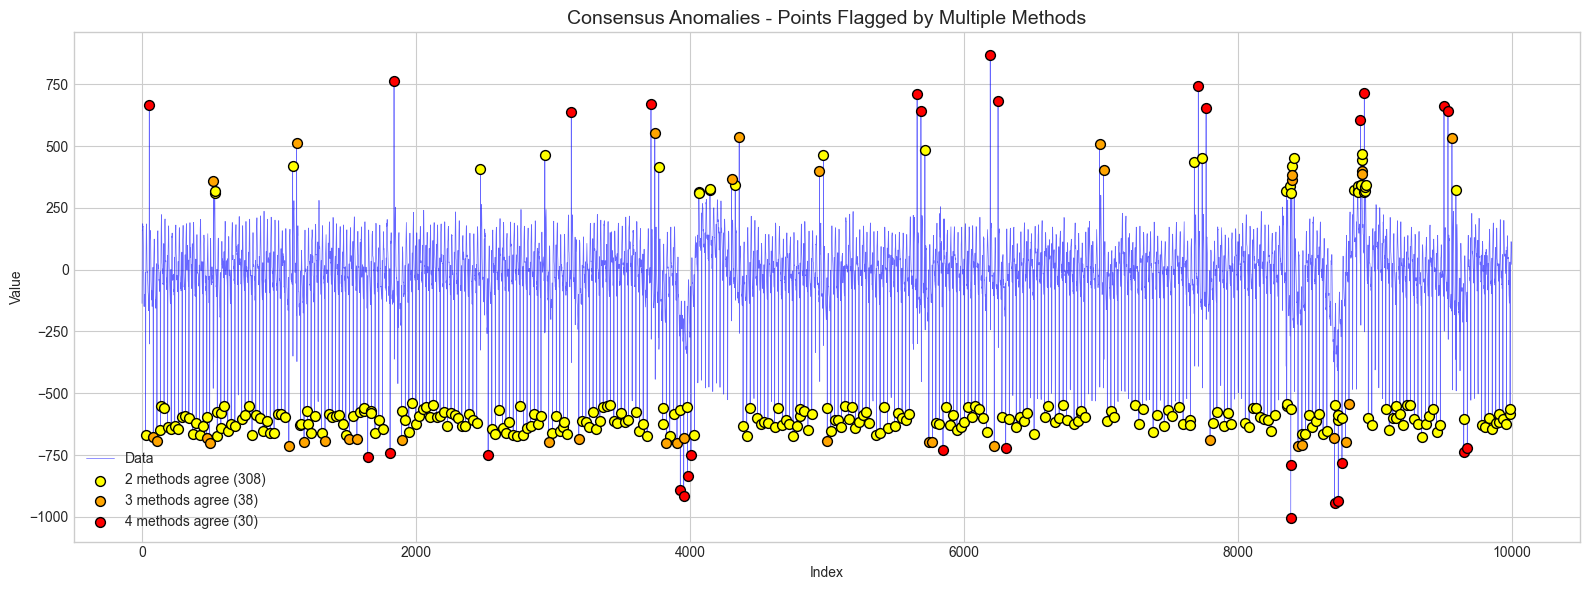



Final anomaly at index 4375 check:
value                -90.854535
index                      4375
value_scaled          -0.383002
z_score                0.383002
zscore_anomaly            False
iqr_anomaly               False
iso_forest_pred               1
iso_forest_anomaly        False
iso_forest_score       0.297097
lof_pred                      1
lof_anomaly               False
lof_score             -1.076606
anomaly_count                 0
Name: 4375, dtype: object


In [12]:
# Visualize consensus anomalies
fig, ax = plt.subplots(figsize=(16, 6))

# Plot all data
ax.plot(df['index'], df['value'], 'b-', linewidth=0.5, alpha=0.6, label='Data')

# Highlight consensus anomalies with different colors based on count
colors = {2: 'yellow', 3: 'orange', 4: 'red'}
for count, color in colors.items():
    mask = df['anomaly_count'] == count
    if mask.sum() > 0:
        ax.scatter(df[mask]['index'], df[mask]['value'], 
                   c=color, s=50, label=f'{count} methods agree ({mask.sum()})', zorder=5, edgecolor='black')

ax.set_title('Consensus Anomalies - Points Flagged by Multiple Methods', fontsize=14)
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.legend()
plt.tight_layout()
plt.show()

print(f"\n\nFinal anomaly at index 4375 check:")
if 4375 in df.index:
    print(df.loc[4375])